# Treino do modelo para recomendação <a name="reino"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import cv2 
from skimage.transform import resize
import os
from keras.preprocessing import image as kimage

import tensorflow as tf
from tensorflow.keras import models, layers, datasets, utils, preprocessing, Model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Dados<a name="dados"></a>

(-0.5, 199.5, 199.5, -0.5)

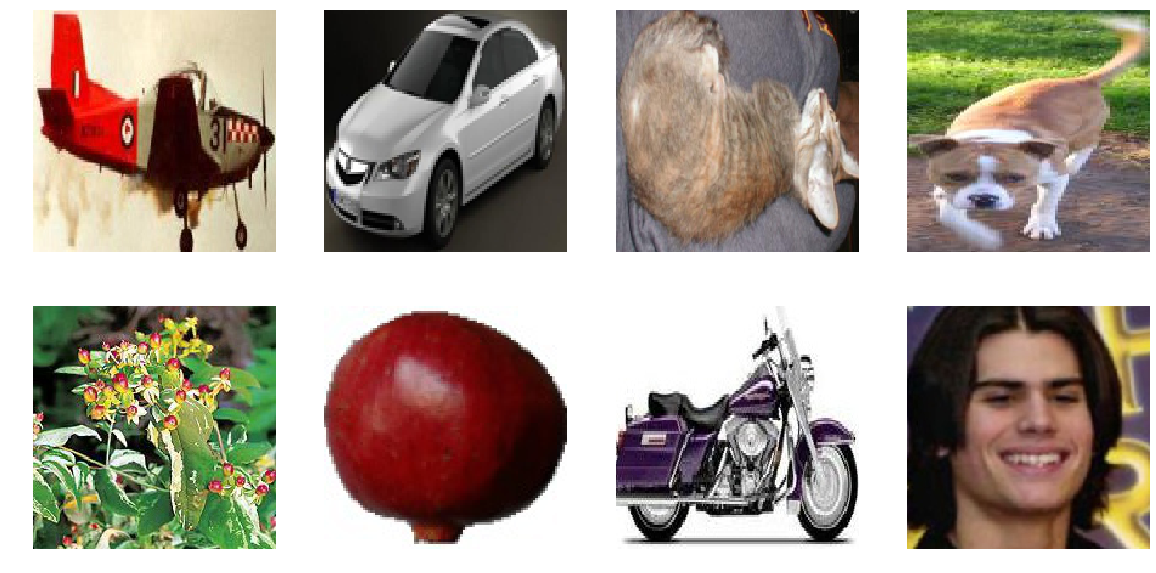

In [2]:
airplane = kimage.load_img(np.random.choice(glob.glob('natural_images/airplane/airplane_0001.jpg')), target_size=(200, 200))
car = kimage.load_img(np.random.choice(glob.glob('natural_images/car/car_0001.jpg')), target_size=(200, 200))
cat = kimage.load_img(np.random.choice(glob.glob('natural_images/cat/cat_0001.jpg')), target_size=(200, 200))
dog = kimage.load_img(np.random.choice(glob.glob('natural_images/dog/dog_0001.jpg')), target_size=(200, 200))
flower = kimage.load_img(np.random.choice(glob.glob('natural_images/flower/flower_0001.jpg')), target_size=(200, 200))
fruit = kimage.load_img(np.random.choice(glob.glob('natural_images/fruit/fruit_0001.jpg')), target_size=(200, 200))
motorbike = kimage.load_img(np.random.choice(glob.glob('natural_images/motorbike/motorbike_0001.jpg')), target_size=(200, 200))
person = kimage.load_img(np.random.choice(glob.glob('natural_images/person/person_0001.jpg')), target_size=(200, 200))

fig, ax = plt.subplots(2,4, figsize=(20, 10))
ax[0,0].imshow(airplane)
ax[0,0].axis('off')
ax[0,1].imshow(car)
ax[0,1].axis('off')
ax[0,2].imshow(cat)
ax[0,2].axis('off')
ax[0,3].imshow(dog)
ax[0,3].axis('off')
ax[1,0].imshow(flower)
ax[1,0].axis('off')
ax[1,1].imshow(fruit)
ax[1,1].axis('off')
ax[1,2].imshow(motorbike)
ax[1,2].axis('off')
ax[1,3].imshow(person)
ax[1,3].axis('off')

In [3]:
classes=[]
directory=os.listdir('natural_images/')
for i in range(len(directory)):
    classes.append(os.listdir('natural_images/')[i])
print(classes)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [4]:
num_img=[]
for i in range(len(classes)):
    num_img_classes=len(os.listdir('natural_images/'+classes[i]))
    num_img.append(num_img_classes)
print(num_img)

[101, 101, 101, 101, 101, 101, 101, 101]


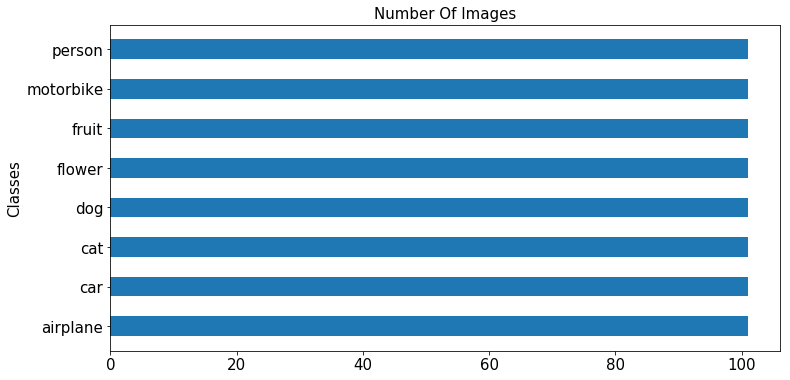

In [5]:
plt.figure(figsize=(12,6))

plt.barh(classes,num_img, align='center',height=0.5)
plt.title('Number Of Images', size=15)
plt.xlabel('', size=15)
plt.xticks(size=15)
plt.ylabel('Classes', size=15)
plt.yticks(size=15)
plt.show()

### Transformar os dados num vector em que o tensorflow consiga fazer a sua leitura.

In [6]:
x_airplane = []
y_airplane = []
for img in glob.glob("natural_images/airplane/*.jpg"):
        n= cv2.imread(img)
        x_airplane.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_airplane.append(classes[0])

In [7]:
x_car = []
y_car = []
for img in glob.glob("natural_images/car/*.jpg"):
        n= cv2.imread(img)
        x_car.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_car.append(classes[1])

In [8]:
x_cat = []
y_cat = []
for img in glob.glob("natural_images/cat/*.jpg"):
        n= cv2.imread(img)
        x_cat.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_cat.append(classes[2])

In [9]:
x_dog = []
y_dog = []
for img in glob.glob("natural_images/dog/*.jpg"):
        n= cv2.imread(img)
        x_dog.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_dog.append(classes[3])

In [10]:
x_flower = []
y_flower = []
for img in glob.glob("natural_images/flower/*.jpg"):
        n= cv2.imread(img)
        x_flower.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_flower.append(classes[4])

In [11]:
x_fruit = []
y_fruit = []
for img in glob.glob("natural_images/fruit/*.jpg"):
        n= cv2.imread(img)
        x_fruit.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_fruit.append(classes[5])

In [12]:
x_motorbike = []
y_motorbike = []
for img in glob.glob("natural_images/motorbike/*.jpg"):
        n= cv2.imread(img)
        x_motorbike.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_motorbike.append(classes[6])

In [13]:
x_person = []
y_person = []
for img in glob.glob("natural_images/person/*.jpg"):
        n= cv2.imread(img)
        x_person.append(resize(n, (100,100),anti_aliasing=True, mode="reflect"))
        y_person.append(classes[7])

In [14]:
X_classes=x_airplane+x_car+x_cat+x_dog+x_flower+x_fruit+x_motorbike+x_person
y_classes=y_airplane+y_car+y_cat+y_dog+y_flower+y_fruit+y_motorbike+y_person

X_classes=np.array(X_classes)
y_classes=np.array(y_classes)

print(np.array(X_classes).shape)
print(np.array(y_classes).shape)

(808, 100, 100, 3)
(808,)


### Conversão dos dados para float32

In [15]:
# Como os dados vão ser convertidos para uma escala entre 0 e 1 tem-se de converter os dados de inteiro8 para float32 para que
# os valores obtidos depois da normalização não sejam inteiros e consequentemente quase todos 0(por não haver números decimais).

#X_classes = X_classes.astype("float32")

### Normalização dos pixeis

In [16]:
# Passar os pixeis para uma escala de 0 a 1 para que o precessamento dos dados seja mais rapido
# Cada pixel ocupa 1 byte e o byte consegue guardar 256 resultados possiveis(ou seja varia entre 0 e 255). 

#X_classes=X_classes/255

### Transformação de variaveis em dummys

In [17]:
y_categorical = LabelEncoder().fit_transform(y_classes)
y_classes = utils.to_categorical(y_categorical)
print(y_classes.shape)

(808, 8)


### Alterar a distribuição dos dados

In [18]:
index = np.arange(X_classes.shape[0])

In [19]:
np.random.seed(100)
np.random.shuffle(index)

In [20]:
X = X_classes[index]
Y = y_classes[index]

### Divisão treino-teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

### Modelo CNN

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(100, 100, 3), activation="relu"))                           
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3,3), activation="relu")) 
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation="relu")) 
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=128, activation="relu")) 
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=8, activation="softmax")) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compilação e Ajuste do modelo CNN

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.fit(X_train, y_train,batch_size=50, epochs=12, validation_data=(X_test, y_test))

Train on 565 samples, validate on 243 samples
Epoch 1/12
565/565 [==============================] - 9s 16ms/sample - loss: 2.0688 - acc: 0.2142 - val_loss: 1.7776 - val_acc: 0.4609
Epoch 2/12
565/565 [==============================] - 7s 13ms/sample - loss: 1.6430 - acc: 0.3894 - val_loss: 1.1872 - val_acc: 0.6626
Epoch 3/12
565/565 [==============================] - 8s 13ms/sample - loss: 1.1639 - acc: 0.5805 - val_loss: 0.8214 - val_acc: 0.7531
Epoch 4/12
565/565 [==============================] - 8s 13ms/sample - loss: 0.7925 - acc: 0.7080 - val_loss: 0.5646 - val_acc: 0.7984
Epoch 5/12
565/565 [==============================] - 8s 14ms/sample - loss: 0.6002 - acc: 0.7982 - val_loss: 0.5092 - val_acc: 0.8313
Epoch 6/12
565/565 [==============================] - 7s 13ms/sample - loss: 0.4415 - acc: 0.8407 - val_loss: 0.5999 - val_acc: 0.7984
Epoch 7/12
565/565 [==============================] - 8s 14ms/sample - loss: 0.4068 - acc: 0.8549 - val_loss: 0.5751 - val_acc: 0.7778
Epoch 8/1

### Previsão e Avaliação do Modelo CNN

In [23]:
predictions = model.predict(X_test)
predictions[3]

array([2.91698202e-02, 6.91518304e-04, 9.45085824e-01, 1.52246365e-02,
       5.06091397e-03, 6.53023366e-04, 4.88335645e-05, 4.06557694e-03],
      dtype=float32)

In [24]:
predictions_index = [np.argmax(index) for index in np.array(predictions)]
predictions_index[0:4]

[5, 1, 7, 2]

In [25]:
y_test_index = [np.argmax(index) for index in np.array(y_test)]
y_test_index[0:4]

[5, 1, 7, 0]

In [26]:
pd.DataFrame({"prediction index": predictions_index, "teste index":y_test_index}).head(5)

,prediction index,teste index
0,5,5
1,1,1
2,7,7
3,2,0
4,1,1


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test_index, predictions_index))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.94      0.97      0.96        34
           2       0.40      0.71      0.52        24
           3       0.47      0.26      0.33        27
           4       0.89      0.89      0.89        28
           5       0.97      1.00      0.99        34
           6       1.00      0.97      0.98        32
           7       0.97      0.94      0.96        34

   micro avg       0.82      0.82      0.82       243
   macro avg       0.81      0.80      0.80       243
weighted avg       0.83      0.82      0.82       243



In [29]:
confusion = confusion_matrix(y_test_index,predictions_index)

In [30]:
outside_columns = ["","","","Predicted","","","",""]
outside_index = ["","","","Actual","","","",""]
inside = ["airplane","car","cat","dog","flower","fruit","motorbike","person"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                              
                 airplane car cat       dog flower fruit motorbike person
       airplane        20   2   6         1      0     1         0      0
       car              0  33   0         0      1     0         0      0
       cat              1   0  17         5      0     0         0      1
Actual dog              3   0  16         7      1     0         0      0
       flower           0   0   1         2     25     0         0      0
       fruit            0   0   0         0      0    34         0      0
       motorbike        0   0   0         0      1     0        31      0
       person           0   0   2         0      0     0         0     32

### Previsão de uma imagem

In [31]:
X_test[0].shape

(100, 100, 3)

In [32]:
image = np.expand_dims(X_test[22],axis = 0)
image.shape

(1, 100, 100, 3)

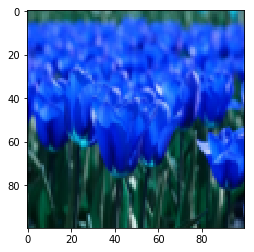

In [33]:
plt.imshow(X_test[22], cmap="gray")

In [34]:
result = model.predict(image)
result.argmax()
result

array([[1.3167655e-08, 1.1469841e-08, 1.3918484e-08, 4.0519257e-08,
        9.9999976e-01, 3.4950476e-10, 8.4992656e-08, 4.0638142e-08]],
      dtype=float32)

In [35]:
def prediction():
    if result.argmax() == 0:
        print("Airplane")
    if result.argmax() == 1:
        print("Car")
    if result.argmax() == 2:
        print("Cat")
    if result.argmax() == 3:
        print("Dog")   
    if result.argmax() == 4:
        print("Flower")
    if result.argmax() == 5:
        print("Fruit")
    if result.argmax() == 6:
        print("Motorbike")       
    if result.argmax() == 7:
        print("Person")   

In [36]:
prediction()

Flower


### Gravar o modelo

In [37]:
model_json = model.to_json()

In [38]:
# gravar o modelo no formato json
with open('model_recommender.json', 'w') as json_file:
    json_file.write(model_json)

In [39]:
# gravar os pesos no formato h5
model.save_weights('model_recommender_weights.h5')

In [40]:
# gravar o modelo no formato h5
model.save('model_recommender.h5')

# Recomendação

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras import Model

### Modelo desenvolvido

In [42]:
from tensorflow.keras.models import model_from_json

In [43]:
# carregar o modelo guardado no formato json
arquivo = open('model_recommender.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

model_cnn = model_from_json(estrutura_rede)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
# carregar o modelo guardado no formato h5
model_cnn = models.load_model("model_recommender.h5")

In [45]:
# carregar os pesos do modelo guardado
model_cnn.load_weights("model_recommender.h5")

In [46]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2166912   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [63]:
# Retirar do modelo treinado as camadas densas para se ficar apenas com as camadas de convolução.
layer_name ='max_pooling2d_1'
recommendation = Model(inputs=model_cnn.input, outputs=model_cnn.get_layer(layer_name).output)

# Filtrar as caracteristicas mais importantes das imagens da base de dados
model_recommendation = recommendation.predict(X_classes)

In [48]:
recommendation.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


### Modelo VGG16

In [49]:
#from keras.models import Model
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [50]:
vgg16 = VGG16(include_top=False, weights='imagenet')

In [51]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [62]:
#X_test_processed = preprocess_input(X_test, mode='tf')
vgg16_recommendation = vgg16.predict(X_classes)

### InceptionV3

In [53]:
from keras.applications import InceptionV3

In [54]:
inceptionV3 = InceptionV3(include_top=False, weights='imagenet')

In [55]:
inceptionV3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [64]:
#X_test_processed = preprocess_input(X_test, mode='tf')
inceptionV3_recommendation = inceptionV3.predict(X_classes)

### Semelhança entre imagens

In [123]:
# Imagem a pesquisar
image=X_test[14]

image_reshaped=image.reshape(1,100,100,3)

In [124]:
# Filtrar as caracteristicas mais importantes da imagem
model_image_recommendation = recommendation.predict(image_reshaped)
vgg16_image_recommendation = vgg16.predict(image_reshaped)
inceptionV3_image_recommendation = inceptionV3.predict(image_reshaped)

In [125]:
image_reshaped = np.expand_dims(image,axis = 0)
#image.shape
result = model.predict(image_reshaped)
result.argmax()

6

In [126]:
if result.argmax()==0:
    model_recommendation_airplane = recommendation.predict(np.array(x_airplane))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_airplane[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)    

if result.argmax()==1:
    model_recommendation_car = recommendation.predict(np.array(x_car))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_car[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)  
        
if result.argmax()==2:
    model_recommendation_cat = recommendation.predict(np.array(x_cat))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_cat[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)  

if result.argmax()==3:
    model_recommendation_dog = recommendation.predict(np.array(x_dog))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_dog[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)  

if result.argmax()==4:
    model_recommendation_flower = recommendation.predict(np.array(x_flower))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_flower[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)     
        
if result.argmax()==5:
    model_recommendation_fruit = recommendation.predict(np.array(x_fruit))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_fruit[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)  
        
if result.argmax()==6:
    model_recommendation_motorbike = recommendation.predict(np.array(x_motorbike))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_motorbike[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)  
        
if result.argmax()==7:
    model_recommendation_person = recommendation.predict(np.array(x_person))
    similarity_model=[]    
    for i in range(101):
        cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation_person[i].ravel().reshape(1,-1))
        similarity_model.append([cos_lib_model,i])
        similarity_model.sort(reverse=True)  
        

In [127]:
#similarity_model=[]
similarity_vgg16=[]
similarity_inceptionV3=[]
for i in range(808):
   # cos_lib_model = cosine_similarity(model_image_recommendation.ravel().reshape(1,-1), model_recommendation[i].ravel().reshape(1,-1))
   # similarity_model.append([cos_lib_model,i])
   # similarity_model.sort(reverse=True)
    
    cos_lib_vgg16 = cosine_similarity(vgg16_image_recommendation.ravel().reshape(1,-1), vgg16_recommendation[i].ravel().reshape(1,-1))
    similarity_vgg16.append([cos_lib_vgg16,i])
    similarity_vgg16.sort(reverse=True)
    
    cos_lib_inceptionV3 = cosine_similarity(inceptionV3_image_recommendation.ravel().reshape(1,-1), inceptionV3_recommendation[i].ravel().reshape(1,-1))
    similarity_inceptionV3.append([cos_lib_inceptionV3,i])
    similarity_inceptionV3.sort(reverse=True)

In [128]:
# Lista com as imagens mais semelhantes
pics_model=[]
pics_vgg16=[]
pics_inceptionV3=[]
for i in range(5):
    pics_model.append(similarity_model[i][1])
    pics_vgg16.append(similarity_vgg16[i][1])
    pics_inceptionV3.append(similarity_inceptionV3[i][1])
print("Modelo:  ", pics_model)
print("VGG16:   ",pics_vgg16)
print("InceptionV3:",pics_inceptionV3)

Modelo:   [43, 44, 2, 3, 4]
VGG16:    [649, 650, 608, 609, 610]
InceptionV3: [649, 702, 689, 608, 625]


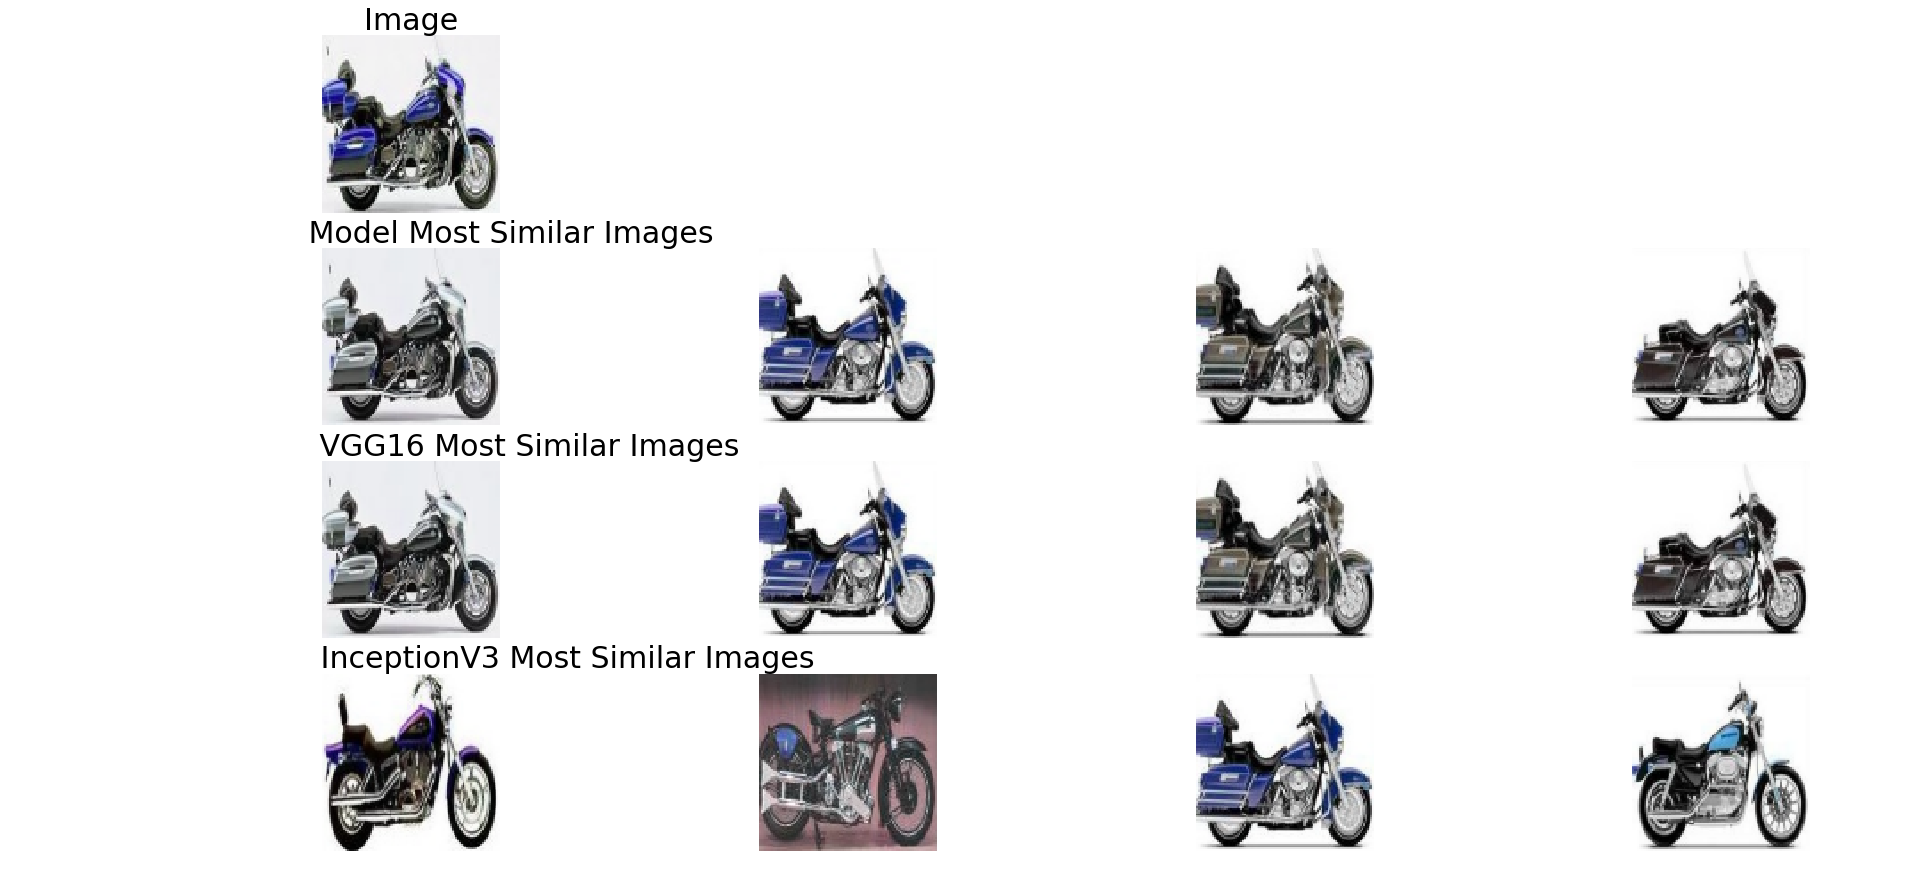

In [129]:
# Comparação entre os três modelos testados
fig, ax = plt.subplots(4,4, figsize=(30, 15))

ax[0,0].imshow(image)
ax[0,0].set_title("Image",size=30)
ax[1,0].set_title("                     Model Most Similar Images",size=30)
ax[2,0].set_title("                         VGG16 Most Similar Images",size=30)
ax[3,0].set_title("                                 InceptionV3 Most Similar Images",size=30)
for i in range(1,5):
    ax[0,i-1].axis('off')
    ax[1,i-1].axis('off')
    if result.argmax()==0:
        ax[1,i-1].imshow(x_airplane[pics_model[i]])
    if result.argmax()==1:
        ax[1,i-1].imshow(x_car[pics_model[i]])
    if result.argmax()==2:
        ax[1,i-1].imshow(x_cat[pics_model[i]])    
    if result.argmax()==3:
        ax[1,i-1].imshow(x_dog[pics_model[i]])
    if result.argmax()==4:
        ax[1,i-1].imshow(x_flower[pics_model[i]])
    if result.argmax()==5:
        ax[1,i-1].imshow(x_fruit[pics_model[i]])
    if result.argmax()==6:
        ax[1,i-1].imshow(x_motorbike[pics_model[i]])
    if result.argmax()==7:
        ax[1,i-1].imshow(x_person[pics_model[i]])

    ax[2,i-1].imshow(X_classes[pics_vgg16[i]])
    ax[2,i-1].axis('off')
    
    ax[3,i-1].imshow(X_classes[pics_inceptionV3[i]])
    ax[3,i-1].axis('off')